In [1]:
# importing the libraries

In [2]:
!pip install tensorflow

In [3]:
pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [4]:
!pip install keras

In [5]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd

In [6]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# load Heart disease dataset
df = pd.read_csv("/content/Heart_Disease_Prediction.csv", delimiter=",")




In [8]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [10]:
df.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object

In [12]:
df['Heart Disease'] = df['Heart Disease'].replace('Presence', 1)
df['Heart Disease'] = df['Heart Disease'].replace('Absence', 0)

In [16]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [18]:
# split into input (X) and output (Y) variables
X = df.iloc[1:,:13]
Y = df.iloc[1:,13]

In [19]:
print(X.shape)

(269, 13)


In [20]:
print(Y.shape)

(269,)


In [47]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=13, activation='relu'))  # Modify input_dim to match the number of features
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=120, batch_size=10)

Epoch 1/120
18/18 [==============================] - 1s 17ms/step - loss: 15.2101 - accuracy: 0.4500 - val_loss: 10.5268 - val_accuracy: 0.4270
Epoch 2/120
18/18 [==============================] - 0s 6ms/step - loss: 6.1372 - accuracy: 0.4500 - val_loss: 3.2083 - val_accuracy: 0.4270
Epoch 3/120
18/18 [==============================] - 0s 5ms/step - loss: 1.5319 - accuracy: 0.5333 - val_loss: 0.7665 - val_accuracy: 0.6629
Epoch 4/120
18/18 [==============================] - 0s 5ms/step - loss: 0.8101 - accuracy: 0.6056 - val_loss: 0.7769 - val_accuracy: 0.6292
Epoch 5/120
18/18 [==============================] - 0s 5ms/step - loss: 0.6925 - accuracy: 0.6778 - val_loss: 0.6995 - val_accuracy: 0.6067
Epoch 6/120
18/18 [==============================] - 0s 5ms/step - loss: 0.6690 - accuracy: 0.6889 - val_loss: 0.6748 - val_accuracy: 0.6629
Epoch 7/120
18/18 [==============================] - 0s 5ms/step - loss: 0.6546 - accuracy: 0.6944 - val_loss: 0.7015 - val_accuracy: 0.5843
Epoch 8/12

In [50]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

9/9 [==============================] - 0s 3ms/step - loss: 0.4195 - accuracy: 0.8141
accuracy: 81.41%


In [51]:
# Visualize training history

# list all data in history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

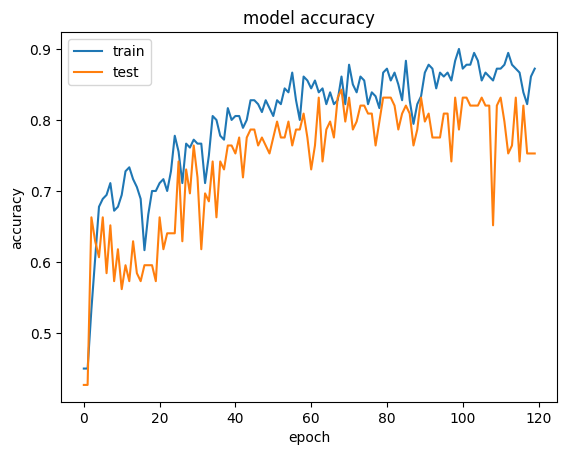

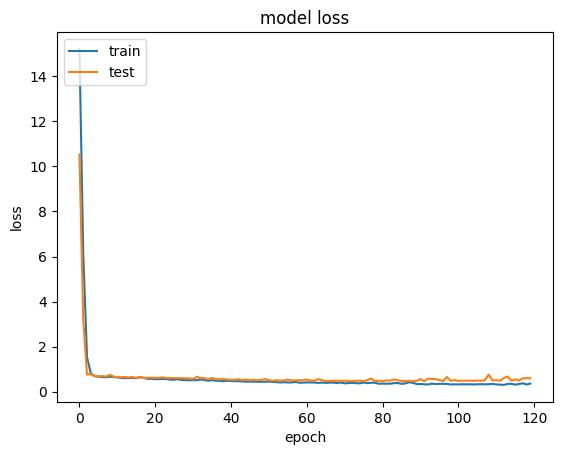

In [52]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()